In [41]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../scripts/")
import os
import pyBigWig
import pandas as pd
import numpy as np
import glob
import subprocess
import utils
import os
import evaluate
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
best_model = 'tutorial_outputs/' #model you want to use for getting predictions
dataset_path = '../data/tfr_datasets/i_2048_w_1/' # testset that is NOT shuffled
targets_i = 0  # which target or cell line to write as bw
out_dir = utils.make_dir('bw_tracks')
chrom_size_path='/home/shush/genomes/GRCh38_EBV.chrom.sizes.tsv'
model, bin_size = utils.read_model(best_model)

In [33]:
testset, targets = evaluate.collect_whole_testset(data_dir=dataset_path, 
                                                      coords=True) # load testset
C, X, Y = utils.convert_tfr_to_np(testset) # convert to np
preds = utils.predict_np(X, model, batch_size=32, reshape_to_2D=False) # get predictions

In [8]:
# create paths for new bs files
pred_bw_filename = os.path.join(out_dir, 'pred_{}.bw'.format(targets[targets_i]))
truth_bw_filename = os.path.join(out_dir, 'truth_{}.bw'.format(targets[targets_i]))
# open 2 bws
pred_bw = utils.open_bw(pred_bw_filename, chrom_size_path)
truth_bw = utils.open_bw(truth_bw_filename, chrom_size_path)

In [9]:
clean_C = [str(c).strip('b\'').strip('\'') for c in C]
for i in range(preds.shape[0]): # per data point 
    chrom, start, end = clean_C[i].split('_') # get chr, start, end
    start = int(start) # to feed into bw making function
    # for cell_line in [8]: # per cell line
    for t in [targets_i]: # per cell line
        # write to ground truth file
        truth_bw.addEntries(chrom, start,
            values=np.array(np.squeeze(Y[i,:,t]), dtype='float64'),
            span=1, step=1)
        # write to prediction bw file
        pred_bw.addEntries(chrom, start,
            values=np.array(np.squeeze(preds[i,:,t]), dtype='float64'),
            span=bin_size, step=bin_size)

In [10]:
truth_bw.close()
pred_bw.close()

In [42]:
bw = pyBigWig.open('bw_tracks/truth_PC-3_replicate_1.bw')

In [52]:
clean_C = [str(c).strip('b\'').strip('\'') for c in C]

chrom, s, e = clean_C[6000].split('_')

In [53]:
coverage = bw.values(chrom, int(s), int(e))

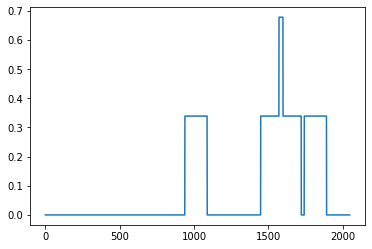

In [54]:
plt.plot(coverage)